# Pymaceuticals Inc.
---

### Analysis
1. The analysis started with 249 mice, after cleaning data we ended up with 248 mice. Ten different drug regimens were tested, including a placebo. 

2. According to the bar chart "Number of Mice Tested per Treatment", mice treated with Capomulin has the highest survival rate compare to the mice treated with other treatment regimens used in the study. Also, summary statistics shows that Capomulin has the second lowest tumor volume median after Ramicane. 

3. Mice population used in the study had 51% of male mice versus 49% of female mice, and decrease/increase in the tumor volume was demonstrated in both genders equally and depended only on the type of a regimen being used as a treatment.

4. The analysis showed that the correlation between mouse weight, and average tumor volume is 0.84. Which indicates a strong positive correlation, when the mouse weight increases the average tumor volume also increases.

5. Capomulin and Ramicane had the most data points out of all the drug regiments in the study. I suggest that more study needs to be done to have a farther analysis of both treatments and to conclude effectiveness of Capomulin versus Ramicane.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_mice_ID


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_df.loc[combined_df['Mouse ID'] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicated_mice_ID)==False]
clean_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
new_number_mice = clean_df["Mouse ID"].nunique()
new_number_mice


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
standard_deviation = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats=pd.DataFrame({ "Mean Tumor Volume" : mean,
                           "Median Tumor Volume": median, 
                           "Tumor Volume Variance": variance, 
                           "Tumor Volume Std. Dev.": standard_deviation,
                           "Tumor Volume Std. Err.": sem
})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
#Using the aggregation method, produce the same summary statistics in a single line.

summary_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

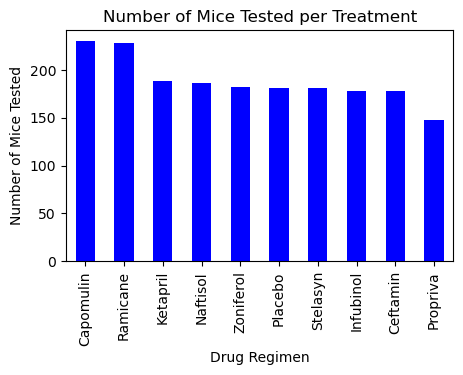

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count=clean_df["Drug Regimen"].value_counts()

plot_data = mice_count.plot(kind="bar", facecolor="blue", figsize=(5,3), align="center",
                                xlabel="Drug Regimen",
                                ylabel="Number of Mice Tested",
                                title="Number of Mice Tested per Treatment")

plt.show()

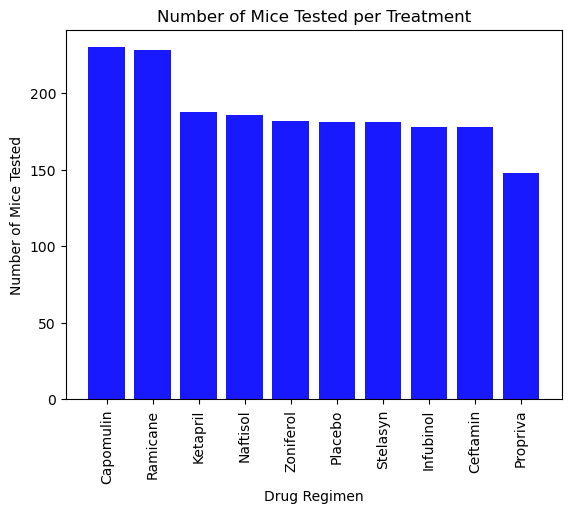

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color="blue", alpha=0.9, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")


plt.show()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data

Male      958
Female    922
Name: Sex, dtype: int64

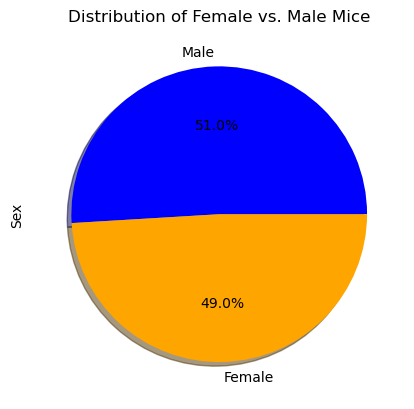

In [31]:

mice_pie_pd = gender_data.plot( kind="pie", y='Mouse ID', title=("Distribution of Female vs. Male Mice"),
                            colors = ["blue","orange"],autopct = "%1.1f%%", shadow = True)

plt.show()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]

sizes = [958, 922]

colors = ["blue", "orange"]



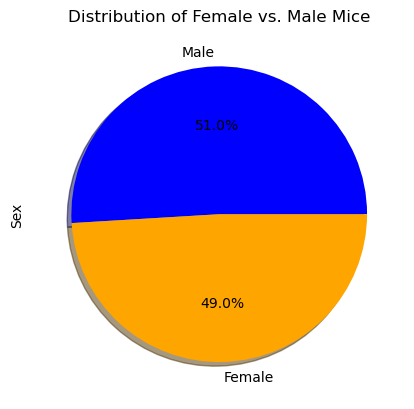

In [32]:
plt.pie(sizes, labels=labels,  colors=colors, autopct="%1.1f%%", shadow=True)

plt.title("Distribution of Female vs. Male Mice")
#plt.legend(loc="best")
plt.ylabel("Sex")

plt.show()



## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()


In [17]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tv_df = pd.merge(max_timepoint , clean_df, on=(["Mouse ID","Timepoint"]))
tv_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for treatment in treatments:
    tv_regimen = tv_df.loc[tv_df["Drug Regimen"] == treatment]
    tumor_vol= tv_regimen['Tumor Volume (mm3)']

    tumor_vol_data.append(tumor_vol)


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    
#Print values 
#Capomulin
print(f"The lower quartile of Capomulin treatment is: {lowerq0}")
print(f"The upper quartile of Capomulin treatment is: {upperq0}")
print(f"The interquartile range of Capomulin treatment is: {IQR0}")
print(f"The median of Capomulin treatment is: {quartile0[0.5]} ")

print("----------------------------------------------------------------")

#Ramicane
print(f"The lower quartile of Ramicane treatment is: {lowerq1}")
print(f"The upper quartile of Ramicane treatment is: {upperq1}")
print(f"The interquartile range of Ramicane treatment is: {IQR1}")
print(f"The median of Ramicane treatment is: {quartile1[0.5]} ")

print("----------------------------------------------------------------")

#Infubinol
print(f"The lower quartile of Infubinol treatment is: {lowerq2}")
print(f"The upper quartile of Infubinol treatment is: {upperq2}")
print(f"The interquartile range of Infubinol treatment is: {IQR2}")
print(f"The median of Infubinol treatment is: {quartile2[0.5]} ")



print("----------------------------------------------------------------")

#Ceftamin
print(f"The lower quartile of Ceftamin treatment is: {lowerq3}")
print(f"The upper quartile of Ceftamin treatment is: {upperq3}")
print(f"The interquartile range of Ceftamin treatment is: {IQR3}")
print(f"The median of Ceftamin treatment is: {quartile3[0.5]} ")


The lower quartile of Capomulin treatment is: 32.37735684
The upper quartile of Capomulin treatment is: 40.1592203
The interquartile range of Capomulin treatment is: 7.781863460000004
The median of Capomulin treatment is: 38.1251644 
----------------------------------------------------------------
The lower quartile of Ramicane treatment is: 31.56046955
The upper quartile of Ramicane treatment is: 40.65900627
The interquartile range of Ramicane treatment is: 9.098536719999998
The median of Ramicane treatment is: 36.56165229 
----------------------------------------------------------------
The lower quartile of Infubinol treatment is: 54.04860769
The upper quartile of Infubinol treatment is: 65.52574285
The interquartile range of Infubinol treatment is: 11.477135160000003
The median of Infubinol treatment is: 60.16518046 
----------------------------------------------------------------
The lower quartile of Ceftamin treatment is: 48.72207785
The upper quartile of Ceftamin treatment is: 

In [20]:
#Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

#Print values 
print(f"For {treatments[0]} potential outliers: value below {lower_bound0} and above {upper_bound0} could be outliers.")
print(f"For {treatments[1]} potential outliers: value below {lower_bound1} and above {upper_bound1} could be outliers.")
print(f"For {treatments[2]} potential outliers: value below {lower_bound2} and above {upper_bound2} could be outliers.")
print(f"For {treatments[3]} potential outliers: value below {lower_bound3} and above {upper_bound3} could be outliers.")

For Capomulin potential outliers: value below 20.70456164999999 and above 51.83201549 could be outliers.
For Ramicane potential outliers: value below 17.912664470000003 and above 54.30681135 could be outliers.
For Infubinol potential outliers: value below 36.83290494999999 and above 82.74144559000001 could be outliers.
For Ceftamin potential outliers: value below 25.355449580000002 and above 87.66645829999999 could be outliers.


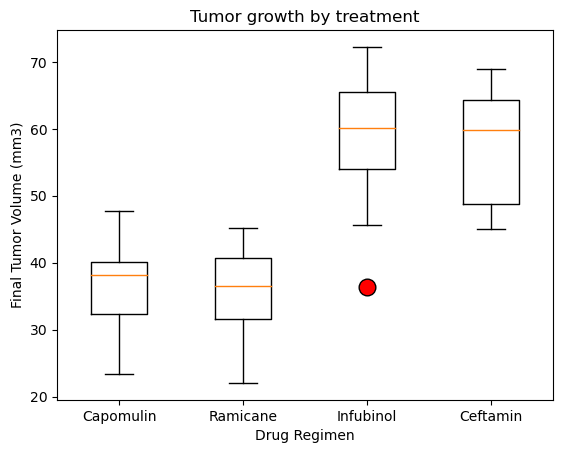

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none')

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor growth by treatment")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)

plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [23]:
Mouse_l509 = clean_df.loc[clean_df["Mouse ID"] == "l509"]
Mouse_l509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


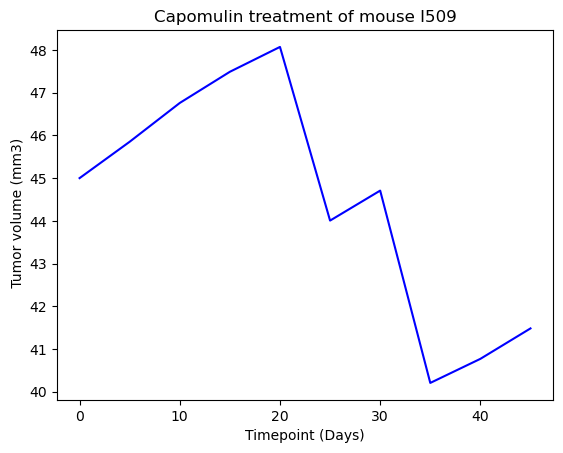

In [24]:

#variables to plot 
tumor_y = Mouse_l509["Tumor Volume (mm3)"]
time_x = Mouse_l509["Timepoint"]

# plot line
plt.plot(time_x, tumor_y, color="blue", linestyle = "solid")

#titles and labels to graph
plt.title( "Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(time_x), max(time_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")


plt.show()


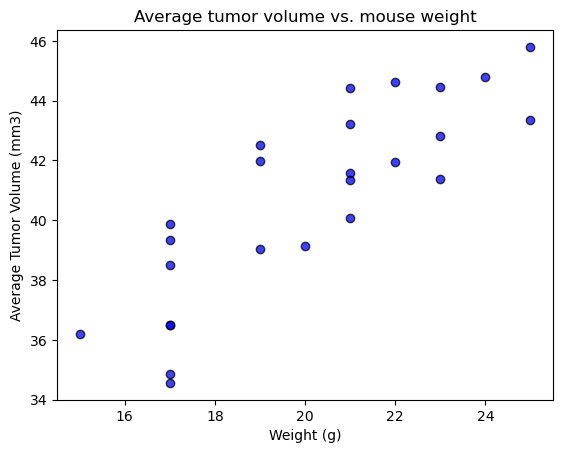

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_group = cap_mice.groupby(["Mouse ID"]).mean()
cap_group.head()

#average tumor volumen
avg_tumor_vol = cap_group["Weight (g)"]
avg_weight = cap_group["Tumor Volume (mm3)"]


plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

#labels to scatter plot 
plt.title("Average tumor volume vs. mouse weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.7088568047708723
y = 0.95x + 21.55


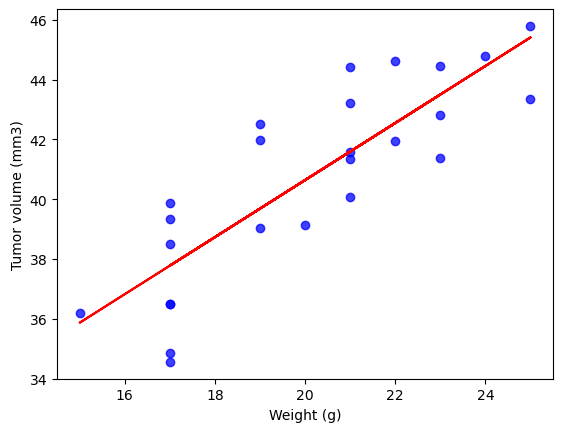

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


#equation for correlation 
correlation = st.pearsonr(avg_tumor_vol,avg_weight)

#equation for regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept

#scatterplot
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="blue", alpha=0.75)
plt.plot(avg_tumor_vol, regress_values,"r-")


#title and labels 
plt.xlabel("Weight (g)")
plt.ylabel("Tumor volume (mm3)")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.annotate(line_eq, (5,10), fontsize=15, color="red")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")
print(line_eq)